In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("insurance_pre.csv")
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [3]:
df.shape

(1338, 6)

In [4]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [5]:
#coverting boolean data type to integer
df=df.astype(int)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0


In [6]:
#creating variable for y_train and y_test
independent=df[['age','bmi','children','sex_male','smoker_yes']]

In [7]:
#creating variable for y_train and y_test
dependent=df[['charges']]

In [8]:
#importing train_test_split for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [42]:
#model creation
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error',max_features='log2',splitter='random')
regressor=regressor.fit(x_train,y_train)

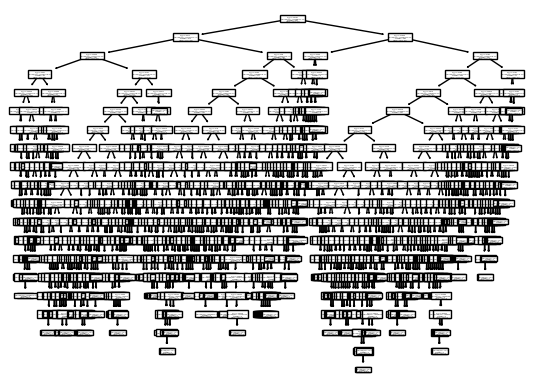

In [43]:
#vizualizing the distribution of data
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [44]:
#assigning to y_pred
y_pred=regressor.predict(x_test)

In [45]:
#evaluating with r2_score
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7253668119815767